<img src ='Soal KNN.png'>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, precision_score,plot_confusion_matrix

In [2]:
wine = pd.read_csv('white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [3]:
wine['label']=np.where(wine['quality']>6,1,0)

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0


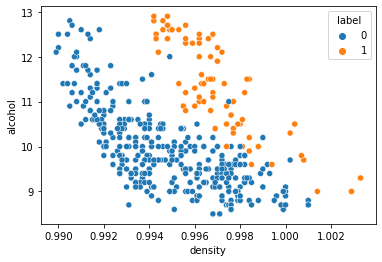

In [5]:
sns.scatterplot(x='density',y='alcohol',data=wine,hue='label')
plt.show()

In [6]:
wine[['alcohol','density']].isnull().sum()

alcohol    1
density    0
dtype: int64

In [7]:
wine['alcohol'].fillna(wine['alcohol'].mean(),inplace=True)

In [8]:
wine[['alcohol','density']].isnull().sum()

alcohol    0
density    0
dtype: int64

In [9]:
wine[['alcohol','density']].describe()

,alcohol,density
count,520.000000,520.000000
mean,10.119461,0.995374
std,1.086787,0.002613
min,8.500000,0.989900
25%,9.300000,0.993400
50%,9.900000,0.995400
75%,10.700000,0.997400
max,12.900000,1.003300


In [10]:
X = wine[['alcohol','density']]
Y = wine['label']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,stratify=Y,random_state=2021)

## Coba Tanpa Scalling

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)

In [12]:
print('KNN (k=3) Accuracy Score :',accuracy_score(Y_test,Y_pred))

KNN (k=3) Accuracy Score : 0.8942307692307693


In [13]:
confusion_matrix(Y_test,Y_pred)

array([[80,  4],
       [ 7, 13]], dtype=int64)

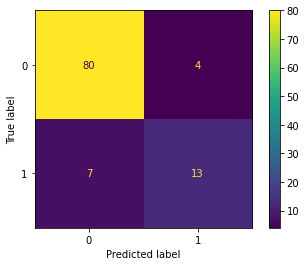

In [14]:
plot_confusion_matrix(knn,X_test,Y_test)
plt.show()

## Pakai Scalling

### MinMax Scaller

In [15]:
scaler = MinMaxScaler()
scaler.fit(X_train) #mempelajari datanya dulu
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled,Y_train)
Y_scaled_pred = knn_scaled.predict(X_test_scaled)

In [17]:
print('KNN (k=3) dengan Scalling MinMax Accuracy Score :',accuracy_score(Y_test,Y_scaled_pred))

KNN (k=3) dengan Scalling MinMax Accuracy Score : 0.9807692307692307


In [18]:
confusion_matrix(Y_test,Y_scaled_pred)

array([[84,  0],
       [ 2, 18]], dtype=int64)

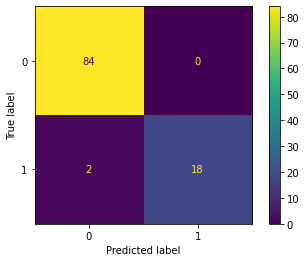

In [19]:
plot_confusion_matrix(knn_scaled,X_test_scaled,Y_test)
plt.show()

# Choose Factor K

In [20]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []
score = 0

In [24]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn_ = KNeighborsClassifier(n_neighbors = i)
    knn_.fit(X_train_scaled, Y_train)
    
    Y_predict_train = knn_.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(Y_train, Y_predict_train))
    
    Y_predict_test = knn_.predict(X_test_scaled)
    testing_accuracies.append(accuracy_score(Y_test, Y_predict_test))
    
    acc_score = accuracy_score(Y_test, Y_predict_test)
    
    if score <= acc_score :#boleh pake < (untuk mencari k pertama dengan acc max) 
                            # atau pake <= (untuk mencari k terakhir dengan acc max)
        score = acc_score
        best_k = i


C:\Users\johan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\johan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


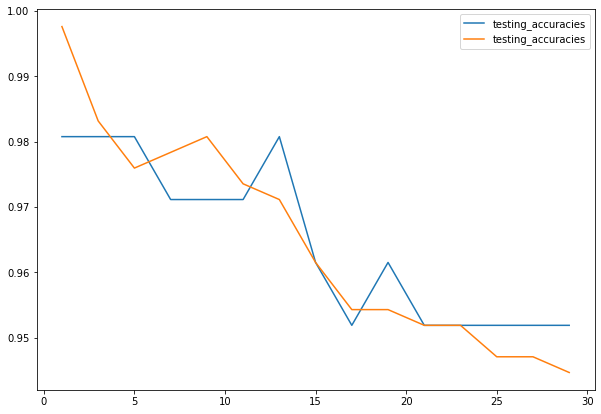

In [25]:
plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies, markers=True)
sns.lineplot(k, training_accuracies, markers=True)
plt.legend(['testing_accuracies','testing_accuracies'])


In [26]:
print('best k :',best_k)
print('best_score :',score)

best k : 13
best_score : 0.9807692307692307


## https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3


In [29]:
np.sqrt(len(wine))

22.80350850198276